In [6]:
import csv
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict

from nltk import FreqDist
from nltk import download
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.metrics.distance import jaro_similarity
from nltk.corpus import cmudict, gutenberg
from nltk.util import bigrams, trigrams
from itertools import combinations
import pronouncing as pr
import re

In [ ]:
download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
download('cmudict')

[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\cmudict.zip.


True

In [51]:
download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

### Q1 Identify the most suitable patterns in the given set of data.

<table>
    <tr>
        <td>Sl No</td>
        <td colspan="7" align="center">Sequence</td>
    </tr>
    <tr>
        <td>1</td>
        <td>2</td>
        <td>4</td>
        <td>6</td>
        <td>8</td>
        <td>10</td>
        <td></td>
    </tr>
    <tr>
        <td>2</td>
        <td>3</td>
        <td>6</td>
        <td>12</td>
        <td>24</td>
        <td>48</td>
        <td></td>
    </tr>
    <tr>
        <td>1</td>
        <td>1</td>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>5</td>
        <td>8</td>
    </tr>
    <tr>
        <td>4</td>
        <td>10</td>
        <td>20</td>
        <td>30</td>
        <td>55</td>
        <td>70</td>
        <td></td>
    </tr>
    <tr>
        <td>5</td>
        <td>100</td>
        <td>50</td>
        <td>25</td>
        <td>12.5</td>
        <td>6.25</td>
        <td></td>
    </tr>

</table>

In [3]:
series_list = [
    [2, 4, 6, 8, 10],
    [3, 6, 12, 24, 48],
    [1, 1, 2, 3, 5, 8],
    [10, 20, 30, 55, 70],
    [100, 50, 25, 12.5, 6.25]
]

def make_pairs(series):
    pairs = []
    for pair in zip(series[:-1], series[1:]):
        pairs.append(pair)
    return pairs

def is_arithmetic(series):
    diff = set()
    pairs = make_pairs(series)
    for pair in pairs:
        diff.add(pair[1] - pair[0])

    if len(diff) == 1:
        return True
    else:    
        return False
    
def is_geometric(series):
    ratio = set()
    pairs = make_pairs(series)
    for pair in pairs:
        ratio.add(pair[1] / pair[0])

    if len(ratio) == 1:
        return True
    else:
        return False
    
def is_fibonacci(series):
    index = 0
    while index < len(series)-2:
        if (series[index] + series[index+1] != series[index+2]):
            return False
        index += 1
    return True

print(f"Currently entered sequences: ")
for series in series_list:
    print(series, end = "\n\n")

print("Checking if any of the series form a pattern")
for series in series_list:
    if is_arithmetic(series):
        print(f"The series {series} forms an arithmetic progression.")
    elif is_geometric(series):
        print(f"The series {series} forms a geometric progression.")
    elif is_fibonacci(series):
        print(f"The series {series} is part of the fibonacci series.")
    else:
        print(f"The series {series} does not have any pattern in them.")



Currently entered sequences: 
[2, 4, 6, 8, 10]

[3, 6, 12, 24, 48]

[1, 1, 2, 3, 5, 8]

[10, 20, 30, 55, 70]

[100, 50, 25, 12.5, 6.25]

Checking if any of the series form a pattern
The series [2, 4, 6, 8, 10] forms an arithmetic progression.
The series [3, 6, 12, 24, 48] forms a geometric progression.
The series [1, 1, 2, 3, 5, 8] is part of the fibonacci series.
The series [10, 20, 30, 55, 70] does not have any pattern in them.
The series [100, 50, 25, 12.5, 6.25] forms a geometric progression.


2. Create a textdata.csv file containing a minimum 10 sentences with a minimum length of 15 words and find the following:
    * Most common words
    * Most common bigrams and trigrams
    * Palindrome word
    * Anagram pairs and rhyming words

Repeat the experiments with any two articles of two authors and find any patterns exists in it.

In [ ]:
# words = {}
# words_list = []
# bigrams_dict = {}
# bigrams_list = []
# trigrams_list = []
# trigrams_dict = {}
# sentences_list = []
# f = open("textdata.csv", 'r')
# print("The sentences in the file are: ", end = "\n")
# csv_content = csv.reader(f)
# for lines in csv_content:
#     for line in lines:
#         print(line)
#         sentences_list.append(line.split())
#         wlist = []
#         for word in line.split():
#             wlist.append(word)
#             if word in words:
#                 words[word] += 1
#             else:
#                 words[word] = 1
#         words_list.append(wlist)


# f.close()
# print('\n')
# sorted_words = sorted(words.items(), key=lambda x: (x[1], x[0]))
# print("The five most common words in the above sentences are:", end = "\n")
# for i in range(1, 6):
#     print(f"{i}. {sorted_words[-i]}")

# for sentence in sentences_list:
#     bigrams = []
#     trigrams = []
#     for bigram in zip(sentence[:-1], sentence[1:]):
#         bigrams.append(bigram)
#     for trigram in zip(sentence[:-1], sentence[1:], sentence[2:]):
#         trigrams.append(trigram)
#     trigrams_list.append(trigrams)
#     bigrams_list.append(bigrams)

# # print(f"bigrams list: {bigrams_list}")
# for bigram in bigrams_list:
#     # print(bigram)
#     bigram_key=""
#     for word in bigram:
#         bigram_key = f"{word[0]}-{word[1]}"
#         # print(bigram_key) 
#         if bigram_key in bigrams_dict:
#             bigrams_dict[bigram_key] += 1
#         else:
#             bigrams_dict[bigram_key] = 1
#     # print(f"bigrams dict: {bigrams_dict}")

# for trigram in trigrams_list:
#     trigram_key = ""
#     for word in trigram:
#         trigram_key = f"{word[0]}-{word[1]}-{word[2]}"
#         if trigram_key in trigrams_dict:
#             trigrams_dict[trigram_key] += 1
#         else:
#             trigrams_dict[trigram_key] = 1
#     # print(f"trigrams dict: {trigrams_dict}")
# sorted_bigrams = sorted(bigrams_dict.items(), key=lambda x: (x[1], x[0]))
# sorted_trigrams = sorted(trigrams_dict.items(), key=lambda x: (x[1], x[0]))
# print("The three most common bigrams in the above sentences are:", end = "\n")
# for i in range(1, 4):
#     print(f"{i}. {sorted_bigrams[-i]}")
# print("The three most common trigrams in the above sentences are:", end = "\n")
# for i in range(1, 4):
#     print(f"{i}. {sorted_trigrams[-i]}")

# palindromes = []
# for sentence in sentences_list:
#     for word in sentence:
        # if word == word[::-1]:
        #     palindromes.append(word)

# if len(palindromes) > 0:
#     print(f"The palindromes found in the above sentences are: { palindromes }")
# else:
#     print("No palindromes found in the above sentences.")

# anagrams_dict = defaultdict(list)


# for word_list in words_list:
#     for word in word_list:
#         sorted_word = ''.join(sorted(word))
#         if len(anagrams_dict[sorted_word]) < 2:
#             anagrams_dict[sorted_word].append(word)
# anagrams_list = list(anagrams_dict.values())
# print(f"The anagram pairs found from the above sentences are: {anagrams_list}")
# print('\n')
# print('\n')

# words_pairs = []
# for word_list in words_list:
#     words_pairs.append(list(combinations(word_list, 2)))


# for pair_list in words_pairs:
#     for word1, word2 in pair_list:
#         if word2 in pr.rhymes(word1):
#             print(f"{word1} and {word2} rhyme.")
    
    


# # for pair_list in words_pairs:
# #     for pair in pair_list:




The sentences in the file are: 
As the sun began to set behind the tall trees, casting a warm a warm golden hue across the sky, the children ran joyfully through the meadow, their laughter echoing across the fields, signaling silent listen the end of another perfect summer day.
After months of careful planning, research, and collaboration with experts from various fields, the team finally unveiled their groundbreaking invention, which they believed would revolutionize the industry and change the way people interact with technology forever.
She stood at the edge of the vast, sprawling desert, feeling the hot wind whip around her face, as she considered the long journey ahead, knowing that the next few days would test her endurance and resolve in ways she had never imagined.
The old mansion, with its creaky floors, faded wallpaper, and overgrown garden, had been abandoned for years, yet there was an undeniable air of mystery that hung around it, as if the walls themselves held secrets wa

In [15]:

def replace_symbol(sentence):
    for symbol in ['*', '@', '#', '$', '%', '^', '&', '(', ')', '_', '+', '=', '{', '}', '[', ']', '|', '\\', ':', ';', '"', "'", '<', '>', ',', '.', '?', '/', '\n', '\t', '\r', '!', '-']:
        sentence = sentence.replace(symbol, '')
    return sentence


def most_common_words(sentences):
    print("The most common words in each sentence are: \n")
    i = 1
    for sentence in sentences:
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        freq = FreqDist(words)
        print(f"{i}) {freq.most_common(3)}")
        i += 1

def most_common_bigrams(sentences):
    print("The most common used bigrams in each sentence are: \n")
    i = 1
    for sentence in sentences:
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        bigrams_list = list(bigrams(words))
        bigrams_freq = FreqDist(bigrams_list)

        for bigram, freq in bigrams_freq.most_common(3):
            print(f"{i}) {bigram} occurred {freq} time(s)")
        
        print("\n")
        i += 1

def find_palindromes(sentences):
    for sentence in sentences:
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        palindromes = []
        for word1 in words:
            if word1 == word1[::-1]:
                palindromes.append(word1)

    if len(palindromes) > 0:
        print(f"The palindromes found in the sentences are: {palindromes}")
    else:
        print(f"No palindromes found in the sentences.")

    print("\n")
        


def find_anagram_pairs(sentences):
    for sentence in sentences:
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        anagram_list = []
        for word1 in words:
            for word2 in words:
                if word1 != word2 and (sorted(word1) == sorted(word2)):
                    anagram_list.append((word1, word2))
    if len(anagram_list) != 0:
        print(f"The anagram pairs found in the sentences are: {anagram_list}")


def most_common_trigrams(sentences):
    print("The most common used trigrams in each sentence are: \n")
    i = 1
    for sentence in sentences:
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        trigrams_list = list(trigrams(words))
        trigrams_freq = FreqDist(trigrams_list)
        for trigram, freq in trigrams_freq.most_common(3):
            print(f"{i}) {trigram} occurred {freq} time(s)")
        print("\n")
        i += 1

def find_rhyming_words(sentences):
    i = 1
    for sentence in sentences:
        rhyming_pairs = []
        sentence = replace_symbol(sentence)
        words = word_tokenize(sentence)
        words = [word.lower() for word in words]
        for word1, word2 in combinations(words, 2):
            if word2 in pr.rhymes(word1) and word1 != word2:
                rhyming_pairs.append((word1, word2))
        print(f"{i}) The rhyming words found in the sentence are: {rhyming_pairs}")
        print("\n")
        i += 1



sentences = []

with open('textdata.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        sentences.append(row[0])

print("The sentences used in this program are:\n")
for sentence in sentences:
    print(sentence)
print("\n")

most_common_words(sentences)
most_common_bigrams(sentences)
most_common_trigrams(sentences)
find_anagram_pairs(sentences)
find_palindromes(sentences)
find_rhyming_words(sentences)


print("Finding the above patterns from the articles of two authors: William Shakespeare and Jane Austen")
caesar = gutenberg.raw('shakespeare-caesar.txt')[:500]
emma = gutenberg.raw('austen-emma.txt')[:500]


print("Finding patterns from the first 500 characters of the play Julius Caesar by William Shakespeare")
most_common_words(sent_tokenize(caesar))
most_common_bigrams(sent_tokenize(caesar))
most_common_trigrams(sent_tokenize(caesar))
find_anagram_pairs(sent_tokenize(caesar))
find_palindromes(sent_tokenize(caesar))
find_rhyming_words(sent_tokenize(caesar))

print("Finding patterns from the first 500 characters of the novel Emma by Jane Austen")
most_common_words(sent_tokenize(emma))
most_common_bigrams(sent_tokenize(emma))
most_common_trigrams(sent_tokenize(emma))
find_anagram_pairs(sent_tokenize(emma))
find_palindromes(sent_tokenize(emma))
find_rhyming_words(sent_tokenize(emma))








The sentences used in this program are:

As the sun began to set behind the tall trees, casting a warm a warm golden hue across the sky, the children ran joyfully through the meadow, their laughter echoing across the fields, signaling silent listen the end of another perfect summer day.
After months of careful planning, research, and collaboration with experts from various fields, the team finally unveiled their groundbreaking invention, which they believed would revolutionize the industry and change the way people interact with technology forever.
She stood at the edge of the vast, sprawling desert, feeling the hot wind whip around her face, as she considered the long journey ahead, knowing that the next few days would test her endurance and resolve in ways she had never imagined.
The old mansion, with its creaky floors, faded wallpaper, and overgrown garden, had been abandoned for years, yet there was an undeniable air of mystery that hung around it, as if the walls themselves held s

Create images with different non overlapped filled shapes. Implement K-means clustering for colour segmentation using those images. Display the shapes seperately

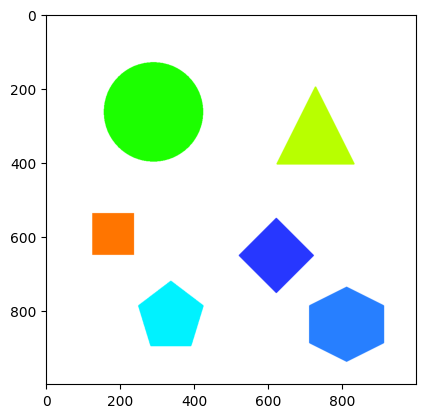

In [ ]:
shapes_img = cv2.imread("images/shapes.png")
